<a href="https://colab.research.google.com/github/swastika-07/TSF/blob/main/TSF_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Swastika Nath

# Data Science & Business Analytics Internship

## GRIP @ The Sparks Foundation

## Batch : October 2023

**Task 1 : Prediction using Supervised Machine Learning**

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hurs they studied.         
This is a simple linear regression task as it involves just two variables.

Step 1 : Importing the required python libraries

In [4]:
#importing all the libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2 : Reading the data from the source

In [5]:
#reading the data from remote link
url = "http://bit.ly/w-data"
students_df = pd.read_csv(url)
print(students_df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Step 3 : Data Exploration

In [6]:
students_df.shape

(25, 2)

In [7]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
students_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking for missing values**

In [9]:
students_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Fortunately there are no null values in the dataset

**Data Visualization**

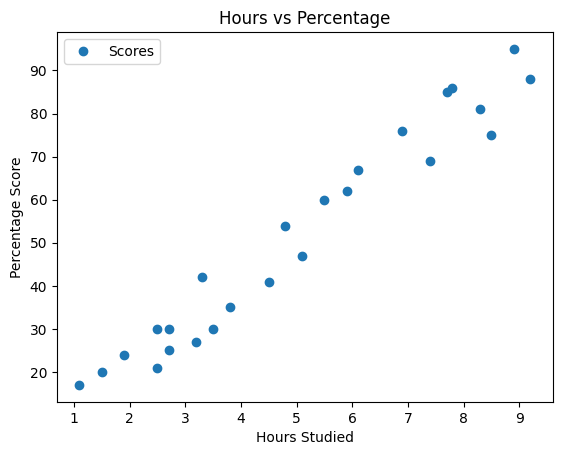

In [10]:
#ploting the distribution of scores
students_df.plot(x='Hours', y='Scores', style= 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph, we can clearly see that there is a positive linear relation between  number of hours studied and percentage of score.

<Axes: xlabel='Hours'>

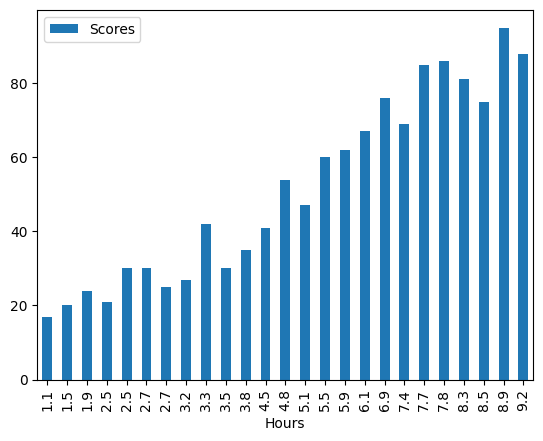

In [11]:
students_df.sort_values(['Hours'], axis=0, ascending= [True], inplace=True)
students_df.plot.bar(x='Hours', y='Scores')

**Checking for outliers using boxplot**

<Axes: >

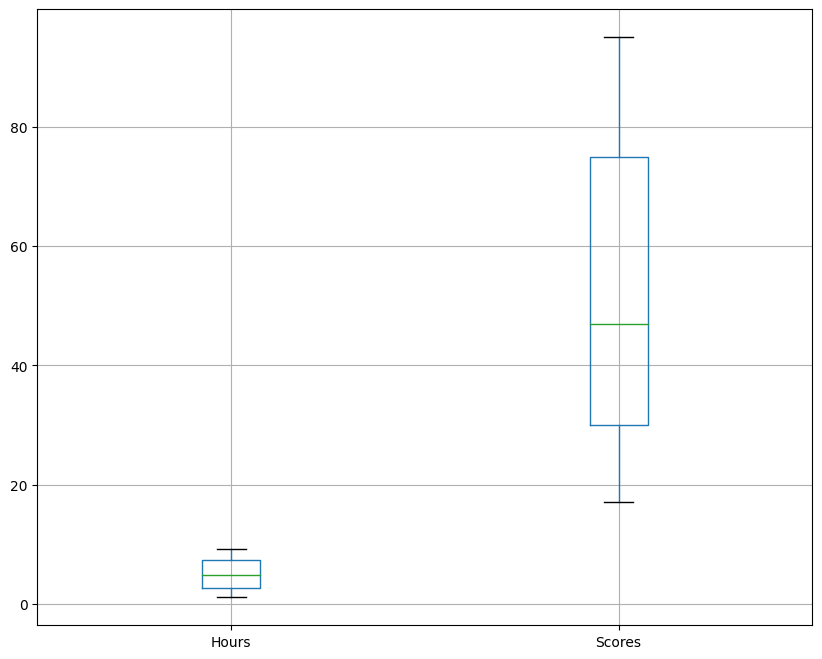

In [12]:
students_df.boxplot(figsize=(10,8))

There are no outliers.

Step 4: Data Preprocessing and Model Fitting

This step involves division of data into "attributes"(inputs) and "labels'(output)

In [13]:
x = students_df.iloc[:, :-1].values
y = students_df.iloc[:,1].values

Step 5: Model Training

**Train and Test Split**

Splitting the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

**Training the algorithm**

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete")

Training Complete


**Plotting the regression line**

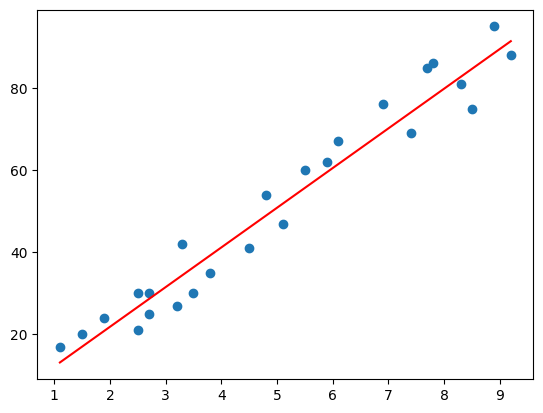

In [16]:
from re import X
regression_line = regressor.coef_*x+ regressor.intercept_

#plotting for the test data
plt.scatter(x, y)
plt.plot(x, regression_line,color="red");
plt.show()

**Making Predictions**

Now that we have trained our algorithm, it's time to test the model by making some predictions

In [21]:
#Testing data - In Hours
print(x_test)



[[2.7]
 [1.9]
 [7.7]
 [6.1]
 [4.5]]


In [22]:
# predicting the scores
y_pred = regressor.predict(x_test)
print(y_pred)


[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [23]:
#Comparing Actual vs Predicted Scores
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual score vs Predicted Score:\n",df)

Actual score vs Predicted Score:
    Actual  Predicted
0      30  28.617714
1      24  20.888033
2      85  76.928222
3      67  61.468859
4      41  46.009497


**Checking Model Accuracy**

In [25]:
Model_accuracy= regressor.score(x_train,y_train)
print("Model Accuracy is :", Model_accuracy)

Model Accuracy is : 0.9526908407020198


**Predicting the score of a student who studies 9.25hrs/day**

In [27]:
#testing the model with our own data
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
our_pred= regressor.predict(test)
print("The predicted score of a student who studies 9.25hrs/day is:", our_pred)

The predicted score of a student who studies 9.25hrs/day is: [91.90447898]


**Evaluating the Model Performance**

In [28]:
#Calculating the Root Mean Squared Error
from sklearn import metrics
import math
MSE= metrics.mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
print("Root Mean Squared Error:\n",RMSE)

Root Mean Squared Error:
 5.14659560183947


In [30]:
#Calculating the Mean Squared Error
print(" Mean Squared Error:\n",metrics.mean_squared_error(y_test,y_pred))

 Mean Squared Error:
 26.48744628887338


In [31]:
#calculating the Mean Absolute Error
print("Mean Absolute Error:\n",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:
 4.621333622532767


In [32]:
#calculating R^2 value
print('R^2:\n',metrics.r2_score(y_test, y_pred))

R^2:
 0.9503831741928792


The value of R^2 gives the score of model fit and in thhis case we have R^2 = 0.9503831741928792, which is actually a great score for this model.